# Dendrograms for Weather Data

## This Script Contains the Following:
1. Importing Libraries and Files
2. Data Wrangling
3. Clustering for All Stations in Year 2010
4. All Stations in 2013
5. All Stations in 2018
6. Creating a Dataframe for PCA

## 01. Importing Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [2]:
path = r'/Users/niravbariya/Documents/Data Science/CareerFoundry/Machine Learning Specialization/Achievement 1/02 Data Sets'

In [3]:
weather = pd.read_csv(os.path.join(path, 'Unsupervised','Dataset-weather-prediction-dataset-processed.csv'),index_col = False)

In [4]:
# Loading Weather Predictions file for whether a given day was pleasant or unpleasant
ans= pd.read_csv(os.path.join(path,'Unsupervised','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'),index_col=False)

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84

## 02. Data Wrangling

In [7]:
weather = weather.drop(columns = 'MONTH')

In [8]:
weather['DATE'] = pd.to_datetime(weather['DATE'],format = '%Y%m%d')

In [9]:
weather.head()

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1960-01-01,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,1960-01-02,6,2.1,0.84,1.018

In [10]:
# Converting the DATE column to datetime type for ans dataframe
ans['DATE'] = pd.to_datetime(ans['DATE'], format = '%Y%m%d')

## 03. Clustering for All Stations in Year 2010

In [11]:
df1 = weather[weather['DATE'].dt.year == 2010]

In [12]:
df1 = df1.drop(columns = 'DATE')

In [13]:
df1.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,8,2.3,0.93,0.9965,0.18,0.56,0,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,3.8,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,3.9,0.89,0.9997,0.12,0.02,0,0.0,-1.1,-2.8,-0.6,6,0.85,0.00,2,-2.6,-5.4,-0.3,2,0.77,1.0056,0.49,0.00,0,6.4,1.6,-0.5,5.0,3.1,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,1.0,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,4.6,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,4.4,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.20,0.43,0,0.0,3.1,0.1,4.9,7,6.0,0.76,1.0110,0.04,0.24,33,0.0,-7.7,-8.9,-4.9,3,5.0,0.73,1.0152,7.1,15.4,4,7.5,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,3.4,0.86,1.0040,0.11,0.0,0.6,-0.7,1.8,1,0.80,1.0121,0.43,0.00,0,6.0,1.7,-1.6,5.0
18264,3,3.0,0.74,1.0193,0.58

In [14]:
# Scaling the data using StandardScalar
df1_scaled = StandardScaler().fit_transform(df1)
df1_scaled = pd.DataFrame(df1_scaled,columns=df1.columns)

In [15]:
df1_scaled.head(3)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1.008562,0.777128,1.509940,-2.381145,-1.162037,0.681868,-0.360027,-0.933688,-0.877406,-0.872786,-0.982242,0.591713,1.059624,-3.170342,-0.940233,4.460660,-0.515057,-0.354836,-0.105643,-0.412322,0.250022,0.0,4.440892e-16,-1.127850,-0.387894,-1.008808,-0.711396,-0.517321,-0.807390,-0.698761,0.476890,-0.218704,-1.192073,-0.861682,-0.428061,-0.137256,-1.461102,-1.688752,-1.445192,1.191419,0.166599,1.057940,-1.609163,-1.066831,-0.428873,-0.304787,-0.908823,-1.350410,-1.132630,-1.520989,0.385647,0.247718,-0.428845,-0.233765,-1.019134,-0.983031,-1.089828,-1.265108,0.153033,-0.837524,-0.726170,-0.450613,-0.204894,0.678574,-1.337554,-1.185283,-1.227316,0.749168,1.215895,-1.892882,-1.101428,0.053850,-0.903679,-1.271774,-0.940867,-1.417604,1.16971,-0.418841,1.280204,-3.064982,-1.178715,

#### Single Method

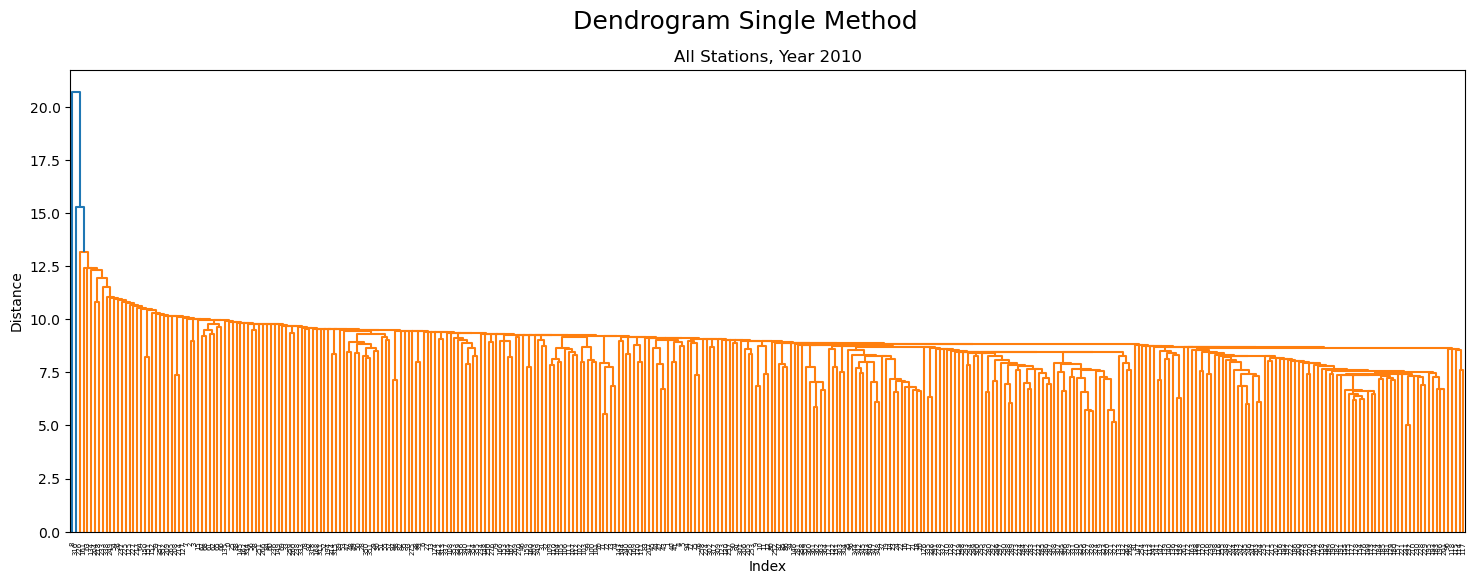

In [16]:
# Clusters and Dendograms using 'single' method
dist_sin = linkage(df1_scaled,method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2010')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

One big cluster is created when using the single method. This isn't very useful as keeping most of the data points in one cluster doesn't give any useful insights.

#### Complete Method

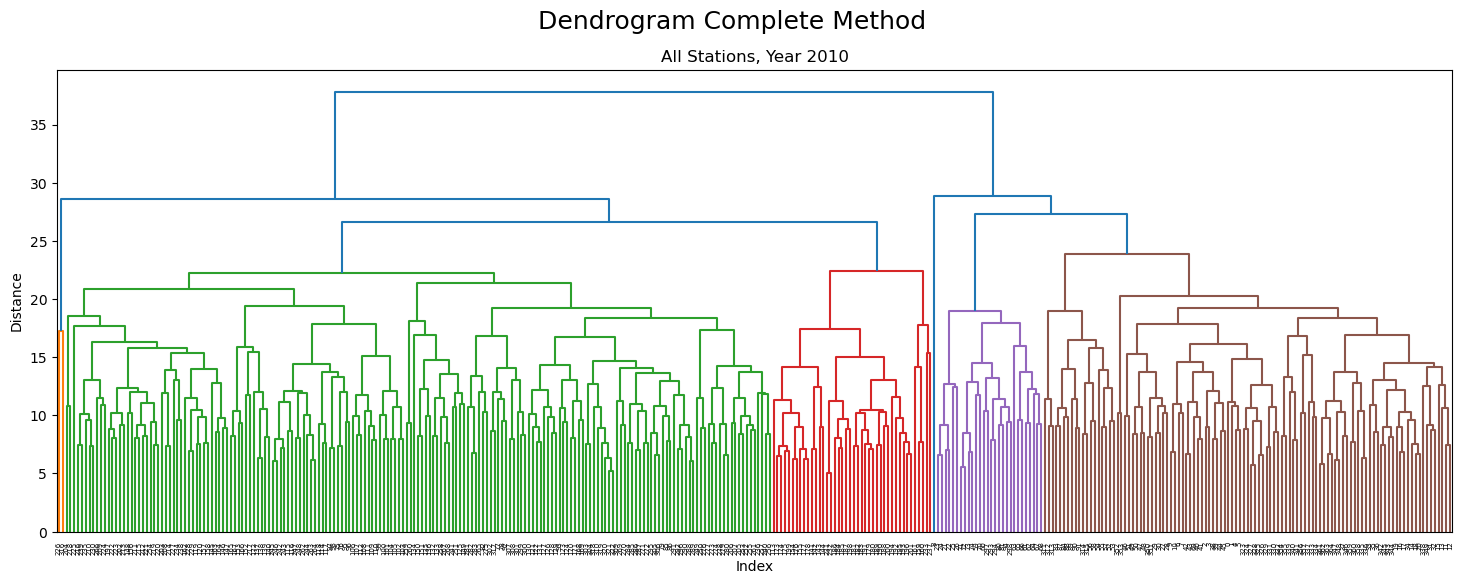

In [17]:
# Clusters and Dendograms using 'complete' method
dist_sin = linkage(df1_scaled,method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2010')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

With complete method we see that there are four clear clusters created. We will store these clusters to check its' distribution.

In [29]:
df1_CM=df1_scaled.copy()
df1_CM['cluster']=fcluster(dist_sin,4, criterion='maxclust')
df1_CM.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,cluster
0,1.008562,0.777128,1.509940,-2.381145,-1.162037,0.681868,-0.360027,-0.933688,-0.877406,-0.872786,-0.982242,0.591713,1.059624,-3.170342,-0.940233,4.460660,-0.515057,-0.354836,-0.105643,-0.412322,0.250022,0.0,4.440892e-16,-1.127850,-0.387894,-1.008808,-0.711396,-0.517321,-0.807390,-0.698761,0.476890,-0.218704,-1.192073,-0.861682,-0.428061,-0.137256,-1.461102,-1.688752,-1.445192,1.191419,0.166599,1.057940,-1.609163,-1.066831,-0.428873,-0.304787,-0.908823,-1.350410,-1.132630,-1.520989,0.385647,0.247718,-0.428845,-0.233765,-1.019134,-0.983031,-1.089828,-1.265108,0.153033,-0.837524,-0.726170,-0.450613,-0.204894,0.678574,-1.337554,-1.185283,-1.227316,0.749168,1.215895,-1.892882,-1.101428,0.053850,-0.903679,-1.271774,-0.940867,-1.417604,1.169710,-0.418841,1.280204,-3.064982,-

In [30]:
df1_CM['cluster'].value_counts(dropna =False)

cluster
3    252
2    110
1      2
4      1
Name: count, dtype: int64

There are 2 major clusters we see. Cluster 1 and 4 has negligible number of data points in comparison. These 3 data points seems to be far away from other points and could be outliers.

#### 'average' Method

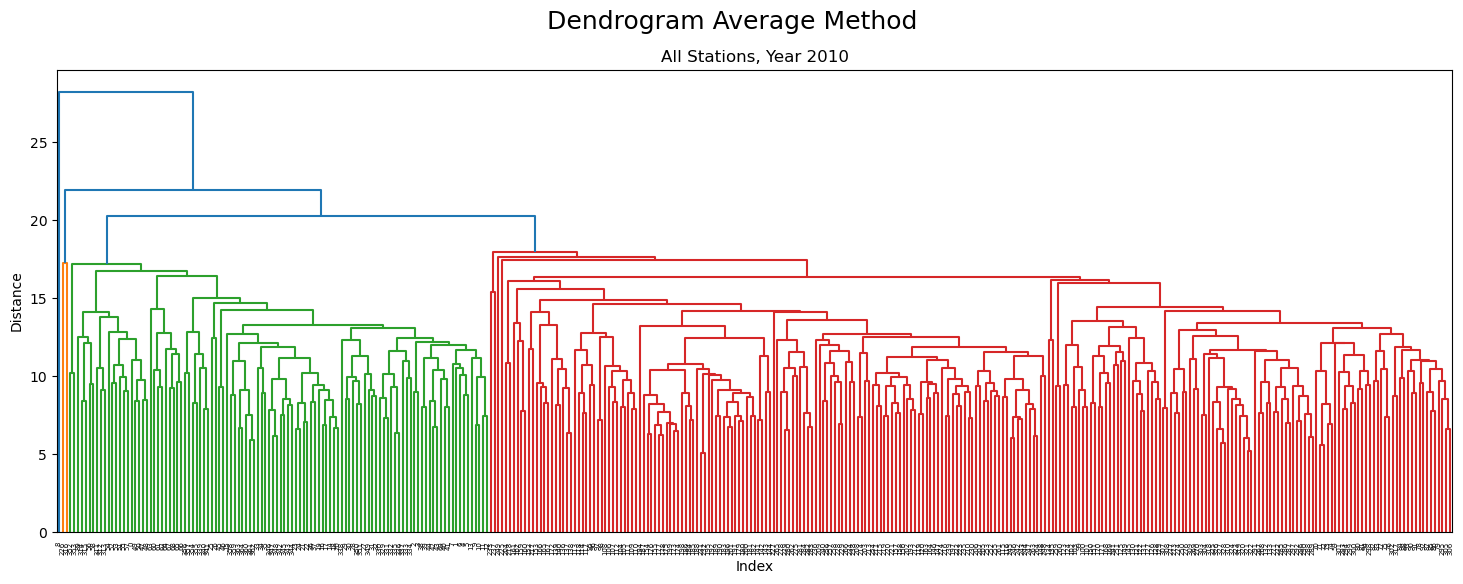

In [20]:
# Clusters and Dendograms using 'average' method
dist_sin = linkage(df1_scaled,method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2010')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

Average method creates two clusters. The distance scale is smaller than 'complete' method. Let's create a column to store these clusters.

In [23]:
df1_AM=df1_scaled.copy()
df1_AM['cluster']=fcluster(dist_sin,4, criterion='maxclust')
df1_AM.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,cluster
0,1.008562,0.777128,1.509940,-2.381145,-1.162037,0.681868,-0.360027,-0.933688,-0.877406,-0.872786,-0.982242,0.591713,1.059624,-3.170342,-0.940233,4.460660,-0.515057,-0.354836,-0.105643,-0.412322,0.250022,0.0,4.440892e-16,-1.127850,-0.387894,-1.008808,-0.711396,-0.517321,-0.807390,-0.698761,0.476890,-0.218704,-1.192073,-0.861682,-0.428061,-0.137256,-1.461102,-1.688752,-1.445192,1.191419,0.166599,1.057940,-1.609163,-1.066831,-0.428873,-0.304787,-0.908823,-1.350410,-1.132630,-1.520989,0.385647,0.247718,-0.428845,-0.233765,-1.019134,-0.983031,-1.089828,-1.265108,0.153033,-0.837524,-0.726170,-0.450613,-0.204894,0.678574,-1.337554,-1.185283,-1.227316,0.749168,1.215895,-1.892882,-1.101428,0.053850,-0.903679,-1.271774,-0.940867,-1.417604,1.169710,-0.418841,1.280204,-3.064982,-

In [24]:
df1_AM['cluster'].value_counts(dropna =False)

cluster
3    252
2    110
1      2
4      1
Name: count, dtype: int64

Again, we have 3 points which are outliers.

#### 'ward' Method

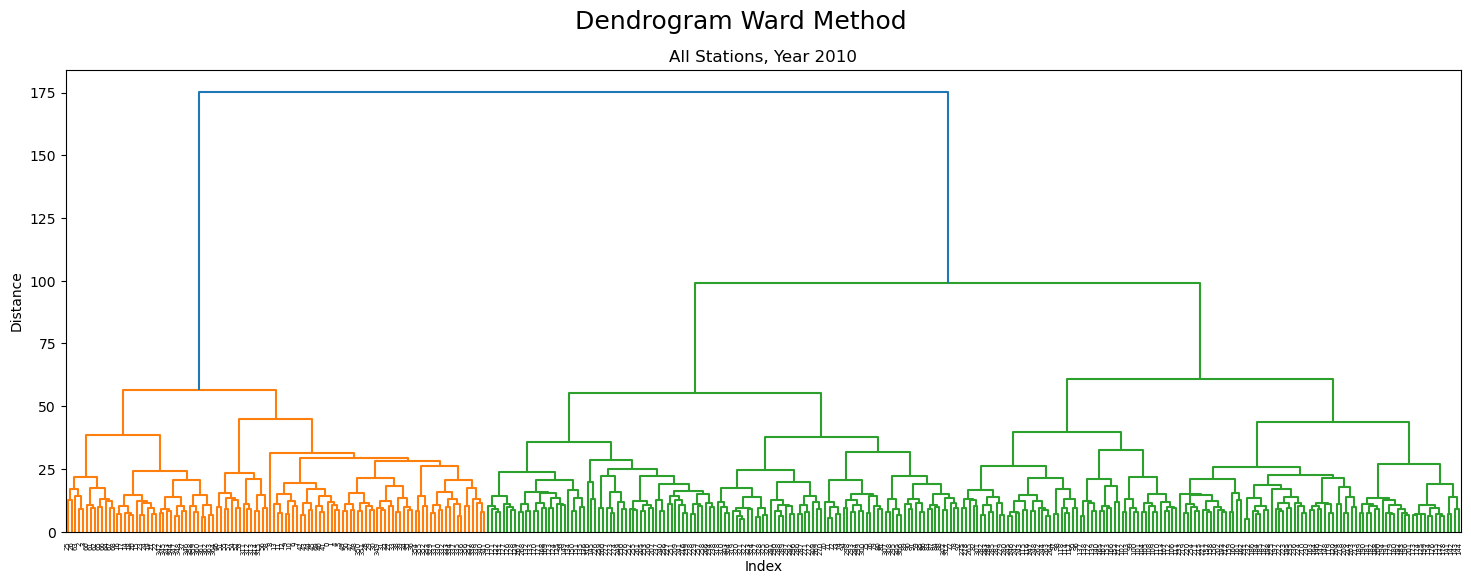

In [31]:
# Clusters and Dendograms using 'ward' method
dist_sin = linkage(df1_scaled,method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2010')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

There are 2 major clusters with distance matric being on the higher side.

In [32]:
df1_WM=df1_scaled.copy()
df1_WM['cluster']=fcluster(dist_sin,2, criterion='maxclust')
df1_WM.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,cluster
0,1.008562,0.777128,1.509940,-2.381145,-1.162037,0.681868,-0.360027,-0.933688,-0.877406,-0.872786,-0.982242,0.591713,1.059624,-3.170342,-0.940233,4.460660,-0.515057,-0.354836,-0.105643,-0.412322,0.250022,0.0,4.440892e-16,-1.127850,-0.387894,-1.008808,-0.711396,-0.517321,-0.807390,-0.698761,0.476890,-0.218704,-1.192073,-0.861682,-0.428061,-0.137256,-1.461102,-1.688752,-1.445192,1.191419,0.166599,1.057940,-1.609163,-1.066831,-0.428873,-0.304787,-0.908823,-1.350410,-1.132630,-1.520989,0.385647,0.247718,-0.428845,-0.233765,-1.019134,-0.983031,-1.089828,-1.265108,0.153033,-0.837524,-0.726170,-0.450613,-0.204894,0.678574,-1.337554,-1.185283,-1.227316,0.749168,1.215895,-1.892882,-1.101428,0.053850,-0.903679,-1.271774,-0.940867,-1.417604,1.169710,-0.418841,1.280204,-3.064982,-

In [33]:
df1_WM['cluster'].value_counts(dropna = False)

cluster
2    255
1    110
Name: count, dtype: int64

Cluster 2 is twice as big as cluster 1. Let's compare these clusters alongside pleasant weather data for some stations to see if there is an overlap.

#### Creating Crosstabs

In [35]:
ans.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,1960-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1960-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1960-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1960-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
df1_AM[['DUSSELDORF_pleasant_weather','STOCKHOLM_pleasant_weather']] = 0

In [126]:
df1_AM.loc[:, ['DUSSELDORF_pleasant_weather','STOCKHOLM_pleasant_weather']] = ans.loc[ans['DATE'].dt.year == 2010, ['DUSSELDORF_pleasant_weather','STOCKHOLM_pleasant_weather']].values

In [127]:
#Cluster and pleasant days for DUSSELDORF
print('Dusseldorf pleasant days:\n')
pd.crosstab(index = [df1_AM['DUSSELDORF_pleasant_weather']],columns =df1_AM['cluster'])

Dusseldorf pleasant days:



cluster,1,2,3,4
DUSSELDORF_pleasant_weather,,,,
0,2,110,172,1
1,0,0,80,0


Interstingly for DUSSELDORF station, **all pleasant days falls in cluster 3**. Unpleasant days primarily are in cluster 2 and 3. This means **if a day falls outside cluster 3, it definately is an unpleasant day.**

Let's check one more station to see if similar pattern can be obseved.

In [39]:
#Cluster and pleasant days for DUSSELDORF
print('Stockholm pleasant days:\n')
pd.crosstab(index = [df1_AM['STOCKHOLM_pleasant_weather']],columns =df1_AM['cluster'])

Stockholm pleasant days:



cluster,1,2,3,4
STOCKHOLM_pleasant_weather,,,,
0,1,110,188,1
1,1,0,64,0


For Stockholm station too, majority of the pleasant days are in cluster 3. This could mean that **cluster 3 could be associated with pleasant days.**

## 04. All Stations in 2013

In [40]:
df2 = weather[weather['DATE'].dt.year == 2013]

In [42]:
df2 = df2.drop(columns = 'DATE')

In [43]:
# Scaling the data using StandardScalar
df2_scaled = StandardScaler().fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled,columns=df2.columns)

In [44]:
df2_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.998874,-0.041420,1.185842,-0.390065,-1.214917,-0.091253,-0.276044,-0.957019,-0.873343,-0.954161,-0.838598,-0.778436,1.784434,0.662270,-0.875002,-0.404213,-0.304563,-1.777780,-1.748923,-1.342424,0.0,0.0,4.440892e-16,-2.430646,-0.376729,-2.049514,-1.675070,-1.604079,-1.466161,0.201197,0.449828,0.600207,-1.179307,-1.119038,2.151201,-0.818672,-0.408231,-0.124668,-0.631869,0.178248,1.144930,1.082162,-1.130390,-1.113403,1.009443,-0.236575,-0.935557,-0.551027,-0.708319,-0.561083,1.042795,-0.987090,-0.308220,-0.380359,-0.741046,-0.607783,-0.719641,-0.657779,0.530994,-0.733409,-0.766445,-0.444911,-0.099747,0.403637,-0.863662,-0.723465,-0.532717,1.419354,0.901929,-1.330495,-1.398182,0.042460,-1.053234,-0.665383,-0.832910,-0.869065,-0.132991,-0.367141,0.553089,0.176787,-0.785646,-0.4

#### 'single' Method

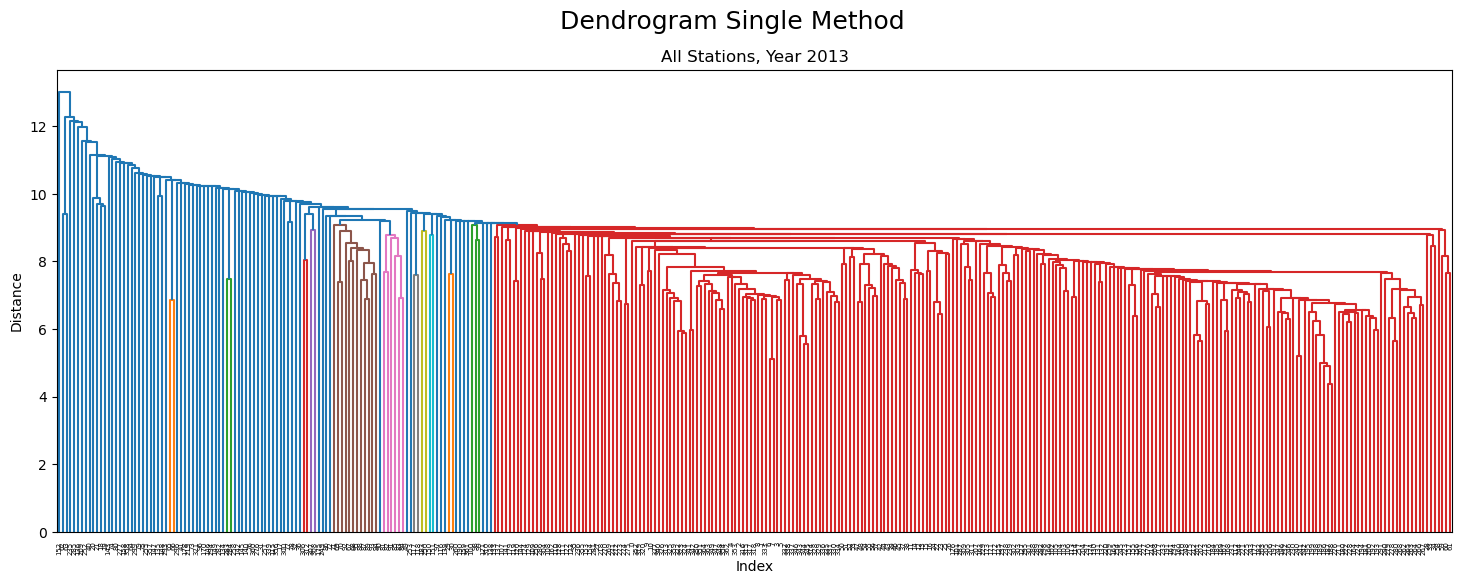

In [45]:
# Clusters and Dendograms using 'single' method
dist_sin = linkage(df2_scaled,method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2013')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

With the 'single' method, the vast majority of the data points belong to one cluster. There are other clusters as well but they are small in comparison.

#### 'complete' Method

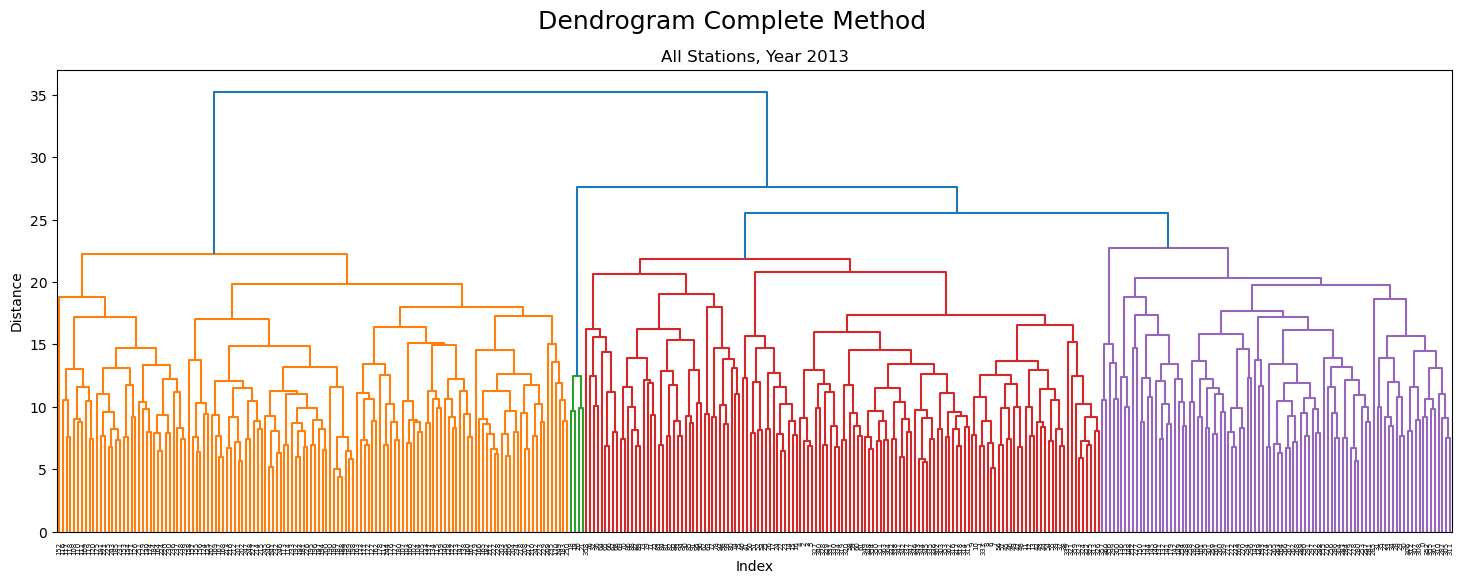

In [46]:
# Clusters and Dendograms using 'complete' method
dist_sin = linkage(df2_scaled,method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2013')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

This time with complete method, we have three major clusters and one very small clusters.

In [48]:
df2_CM=df2_scaled.copy()
df2_CM['cluster']=fcluster(dist_sin,4, criterion='maxclust')

In [49]:
df2_CM['cluster'].value_counts(dropna = False)

cluster
3    135
1    134
4     92
2      4
Name: count, dtype: int64

Below we add pleasant days data to see if there is any connection between the clusters and whether a day was pleasant or not.

In [128]:
# Creating columns and intializing columns to 0
df2_CM[['HEATHROW_pleasant_weather', 'MUNCHENB_pleasant_weather']] = 0

In [129]:
df2_CM.loc[:, ['HEATHROW_pleasant_weather', 'MUNCHENB_pleasant_weather']] = ans.loc[ans['DATE'].dt.year == 2013, ['HEATHROW_pleasant_weather', 'MUNCHENB_pleasant_weather']].values

In [53]:
print('Pleasant weather and clusters for Heathrow station:\n')
pd.crosstab(df2_CM['HEATHROW_pleasant_weather'],df2_CM['cluster'])

Pleasant weather and clusters for Heathrow station:



cluster,1,2,3,4
HEATHROW_pleasant_weather,,,,
0,72,4,135,77
1,62,0,0,15


In [54]:
print('Pleasant weather and clusters for Munich station:\n')
pd.crosstab(df2_CM['MUNCHENB_pleasant_weather'],df2_CM['cluster'])

Pleasant weather and clusters for Munich station:



cluster,1,2,3,4
MUNCHENB_pleasant_weather,,,,
0,60,4,135,82
1,74,0,0,10


In both instances, **most of the pleasant weather days falls under cluster 1** with cluster 4 having remaing of the pleasant days. In contrast, majority of unpleasant days fall under cluster 3. There are 0 pleasant days in cluster 2 and 3 indicating if a day falls in these cluster, it surely is unpleasant day.

#### 'average' Method

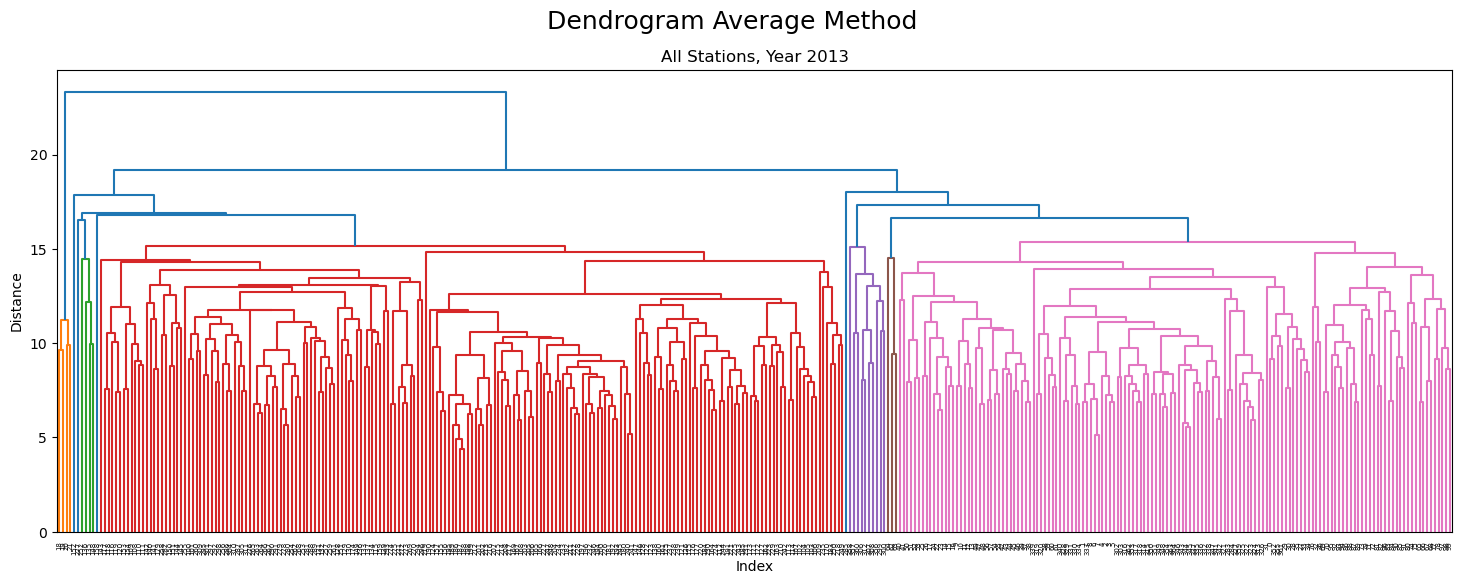

In [55]:
# Clusters and Dendograms using 'average' method
dist_sin = linkage(df2_scaled,method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2013')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

We can observe that there are two major clusters and in comparison other clusters are small.

In [57]:
df2_AM=df2_scaled.copy()
df2_AM['cluster']=fcluster(dist_sin,6, criterion='maxclust')

In [58]:
df2_AM['cluster'].value_counts(dropna = False)

cluster
2    201
5    148
4     10
1      4
3      1
6      1
Name: count, dtype: int64

The small clusters seems to be exceptional days as their distance from other cluster is high.

#### 'ward' method

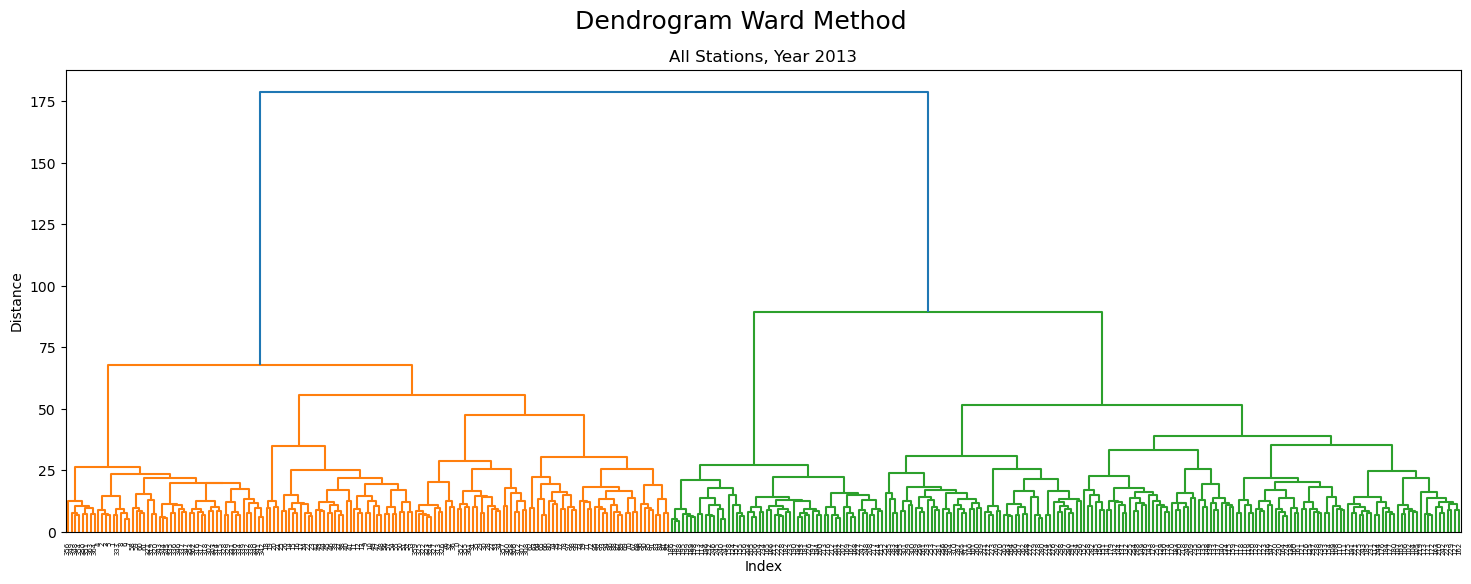

In [60]:
# Clusters and Dendograms using 'ward' method
dist_sin = linkage(df2_scaled,method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2013')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

With ward method we have 2 clusters as we can see from the dendogram. The distance scale is larger when compared to other methods.

In [62]:
df2_WM=df2_scaled.copy()
df2_WM['cluster']=fcluster(dist_sin,2, criterion='maxclust')

In [63]:
df2_WM['cluster'].value_counts(dropna = False)

cluster
2    207
1    158
Name: count, dtype: int64

Creating crosstab for ward method using Heathrow and Munich pleasant weather data.

In [64]:
# Creating columns and intializing columns to 0
df2_WM[['HEATHROW_pleasant_weather','MUNCHENB_pleasant_weather']] = 0

In [65]:
# assing columns from ans to df2_WM
df2_WM.loc[:, ['HEATHROW_pleasant_weather','MUNCHENB_pleasant_weather']] = ans.loc[ans['DATE'].dt.year == 2013,
                                                                                    ['HEATHROW_pleasant_weather','MUNCHENB_pleasant_weather']].values

In [66]:
print('Pleasant weather and clusters for Heathrow station:\n')
pd.crosstab(df2_WM['HEATHROW_pleasant_weather'],df2_WM['cluster'])

Pleasant weather and clusters for Heathrow station:



cluster,1,2
HEATHROW_pleasant_weather,,
0,158,130
1,0,77


In [67]:
print('Pleasant weather and clusters for Munich station:\n')
pd.crosstab(df2_WM['MUNCHENB_pleasant_weather'],df2_WM['cluster'])

Pleasant weather and clusters for Munich station:



cluster,1,2
MUNCHENB_pleasant_weather,,
0,158,123
1,0,84


There is **clear separation of pleasant days in cluster 2**. That means, if a day falls in cluster 1 it is surely an unpleasant day.

## 05. All Stations in 2018

In [78]:
df3 = weather[weather['DATE'].dt.year == 2018]

In [79]:
df3 = df3.drop(columns = 'DATE')

In [80]:
# Scaling the data using StandardScalar
df3_scaled = StandardScaler().fit_transform(df3)
df3_scaled = pd.DataFrame(df3_scaled,columns=df3.columns)

In [81]:
df3_scaled.head(2)

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.315402,3.812779,-0.521626,-0.730014,-1.183295,-0.002371,-0.142056,-0.253091,-0.586186,-0.439189,-0.781004,-0.322207,1.110223e-16,-0.316310,2.220446e-16,-0.189782,-2.664535e-15,-0.860237,-1.123342,-0.632067,0.0,0.0,4.440892e-16,0.0,0.088113,1.776357e-15,-1.085374,-1.212493,-1.004610,0.503406,1.209309,0.594589,-1.896725,-1.074931,0.898182,-0.768133,-0.664548,-0.251113,-0.856411,0.463636,2.110471,0.587718,-1.817709,-1.124166,1.555460,-0.098705,-1.027404,-0.700050,-0.366659,-0.896468,0.297022,-0.986563,-0.277648,-0.340243,-0.306420,-0.421233,-0.402962,0.44403,0.297671,-1.622420,-1.092211,-0.447705,-0.070398,-1.029142,-0.916790,-0.536001,-0.581459,4.440892e-16,1.110223e-16,0.0,-2.220446e-16,2.775558e-17,0.0,1.776357e-15,1.776357e-15,5.329071e-15,1.26982,0.576021,1.382041,-0.694

#### 'single' Method

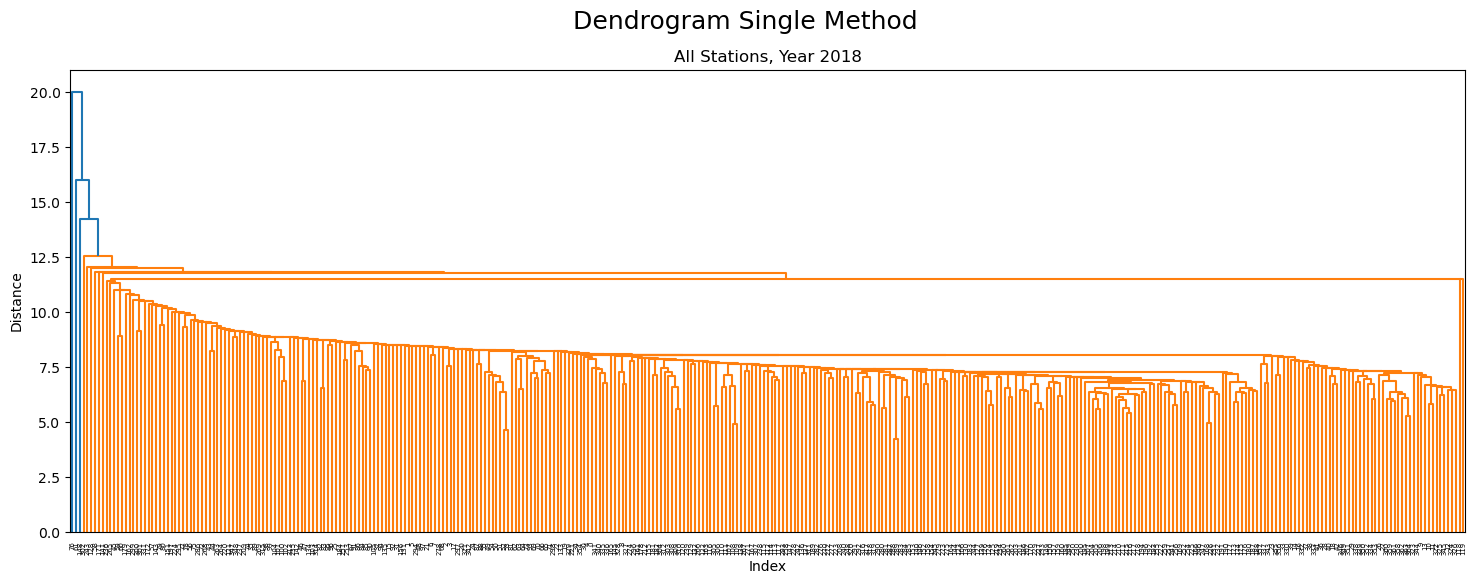

In [82]:
# Clusters and Dendograms using 'single' method
dist_sin = linkage(df3_scaled,method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2018')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

With 'single' method we have a cluster which has most of the data points.

#### 'complete' Method

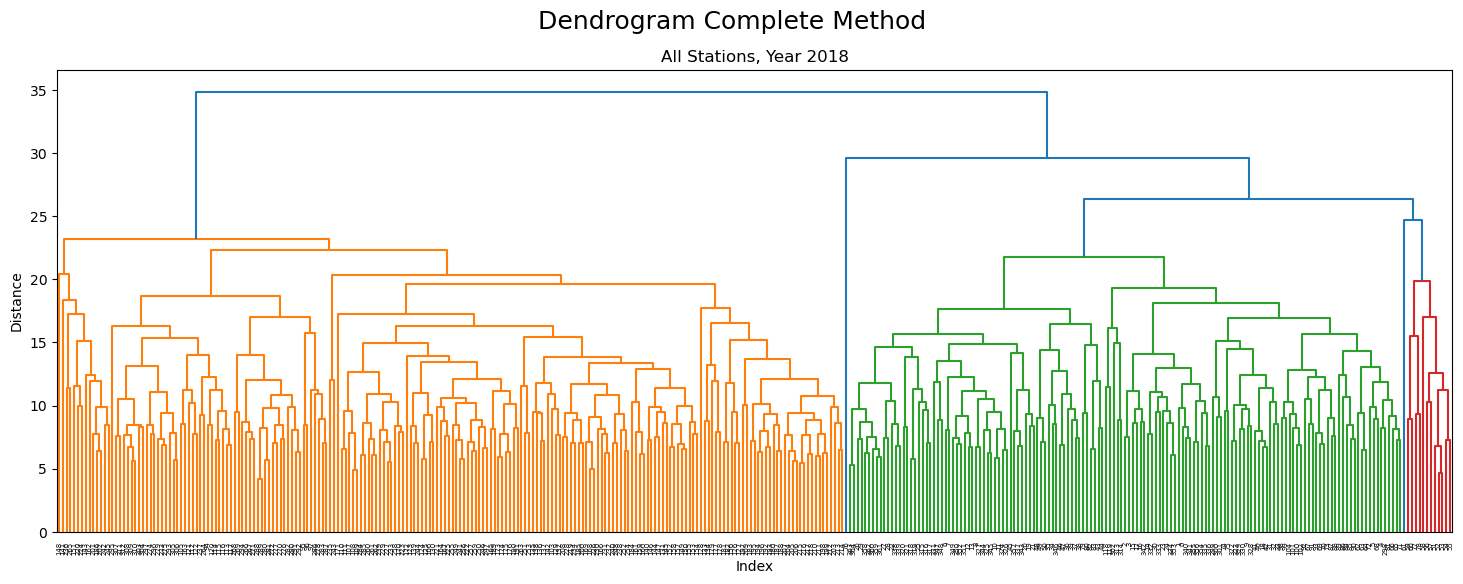

In [83]:
# Clusters and Dendograms using 'complete' method
dist_sin = linkage(df3_scaled,method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2018')W
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

We observe 2 big clusters and 1 relatively small clusters with complete method. One value in particular seems to be an outlier as it is at a great distance from all the other clusters.

#### Creating Crosstab to check Pleasant weather Data

In [87]:
df3_CM=df3_scaled.copy()
df3_CM['cluster']=fcluster(dist_sin,4, criterion='maxclust')

In [88]:
df3_CM['cluster'].value_counts(dropna = False)

cluster
1    206
2    145
3     13
4      1
Name: count, dtype: int64

In [89]:
# Adding Pleasant and Unpleasant data to the cluster dataframe
df3_CM[['BUDAPEST_pleasant_weather','BASEL_pleasant_weather']] = 0
df3_CM.loc[:, ['BUDAPEST_pleasant_weather','BASEL_pleasant_weather']] = ans.loc[ans['DATE'].dt.year == 2018, ['BUDAPEST_pleasant_weather','BASEL_pleasant_weather']].values

In [90]:
print('Budapest pleasant weather days:')

print(pd.crosstab(df3_CM['BUDAPEST_pleasant_weather'],df3_CM['cluster']))

Budapest pleasant weather days:
cluster                      1    2   3  4
BUDAPEST_pleasant_weather                 
0                           65  136  13  1
1                          141    9   0  0


In [91]:
print('Basel pleasant weather days:')

print(pd.crosstab(df3_CM['BASEL_pleasant_weather'],df3_CM['cluster']))

Basel pleasant weather days:
cluster                   1    2   3  4
BASEL_pleasant_weather                 
0                        84  140  13  1
1                       122    5   0  0


**Majority of pleasant days are in cluster 1**. Unpleasant days are centered in cluster 2, with cluster 1 having second highest number. **Cluster 3 and 4** have very few days and these are unpleasant days. **These days could have seen extreme weather conditions.**

#### 'average' Method

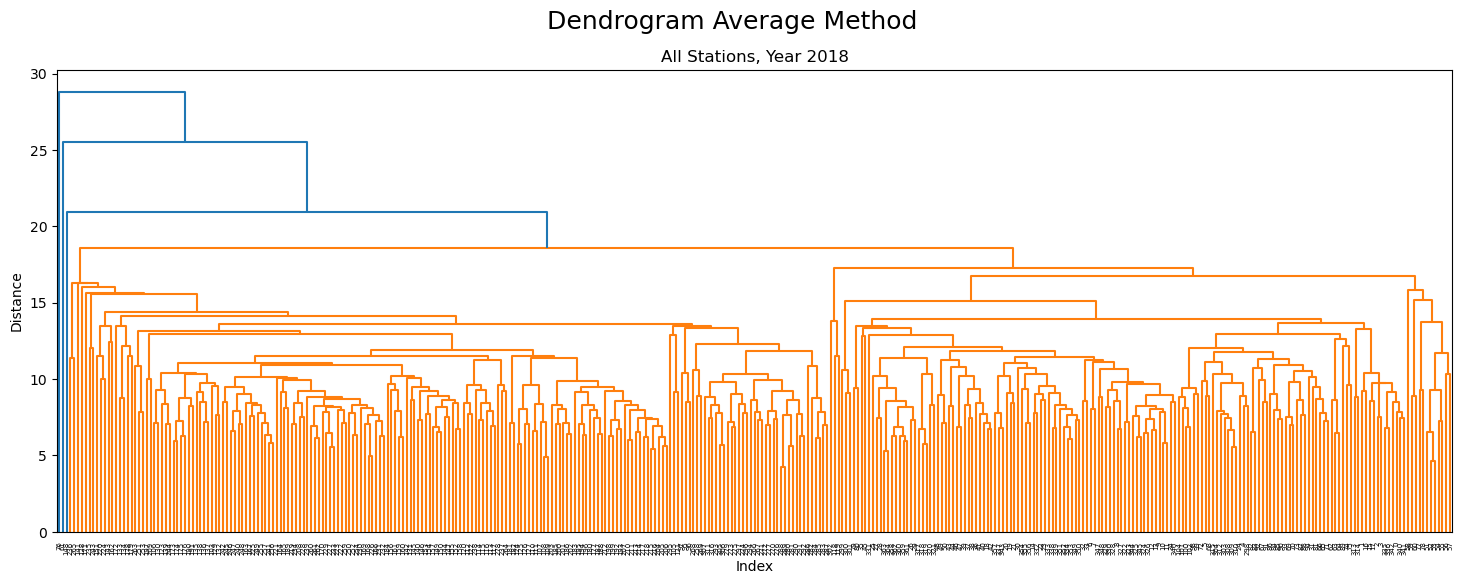

In [92]:
# Clusters and Dendograms using 'average' method
dist_sin = linkage(df3_scaled,method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2018')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

Average method creates 1 big cluster. There are a few outliers in this case too.

In [96]:
df3_AM=df3_scaled.copy()
df3_AM['cluster']=fcluster(dist_sin,6, criterion='maxclust')

In [97]:
df3_AM['cluster'].value_counts(dropna = False)

cluster
1    199
3    160
2      3
5      1
6      1
4      1
Name: count, dtype: int64

If we create 6 clusters we see that there are 2 big clusters. Due to some very different days the metric is forcing the two big clusters into becoming 1 cluster.

In [98]:
# Adding Pleasant and Unpleasant data to the cluster dataframe
df3_AM[['BUDAPEST_pleasant_weather','BASEL_pleasant_weather']] = 0
df3_AM.loc[:, ['BUDAPEST_pleasant_weather','BASEL_pleasant_weather']] = ans.loc[ans['DATE'].dt.year == 2018, ['BUDAPEST_pleasant_weather','BASEL_pleasant_weather']].values

In [99]:
print('Budapest station pleasant weather:')

pd.crosstab(df3_AM['BUDAPEST_pleasant_weather'],df3_AM['cluster'])

Budapest station pleasant weather:


cluster,1,2,3,4,5,6
BUDAPEST_pleasant_weather,,,,,,
0,63,2,148,0,1,1
1,136,1,12,1,0,0


In [100]:
print('Basel station pleasant weather:')

pd.crosstab(df3_AM['BASEL_pleasant_weather'],df3_AM['cluster'])

Basel station pleasant weather:


cluster,1,2,3,4,5,6
BASEL_pleasant_weather,,,,,,
0,77,3,155,1,1,1
1,122,0,5,0,0,0


Again, majority of pleasant days clearly belong to cluster 1 in both cases. That means if a day falls in cluster 1, it is likely unpleasant.

#### 'ward' Method

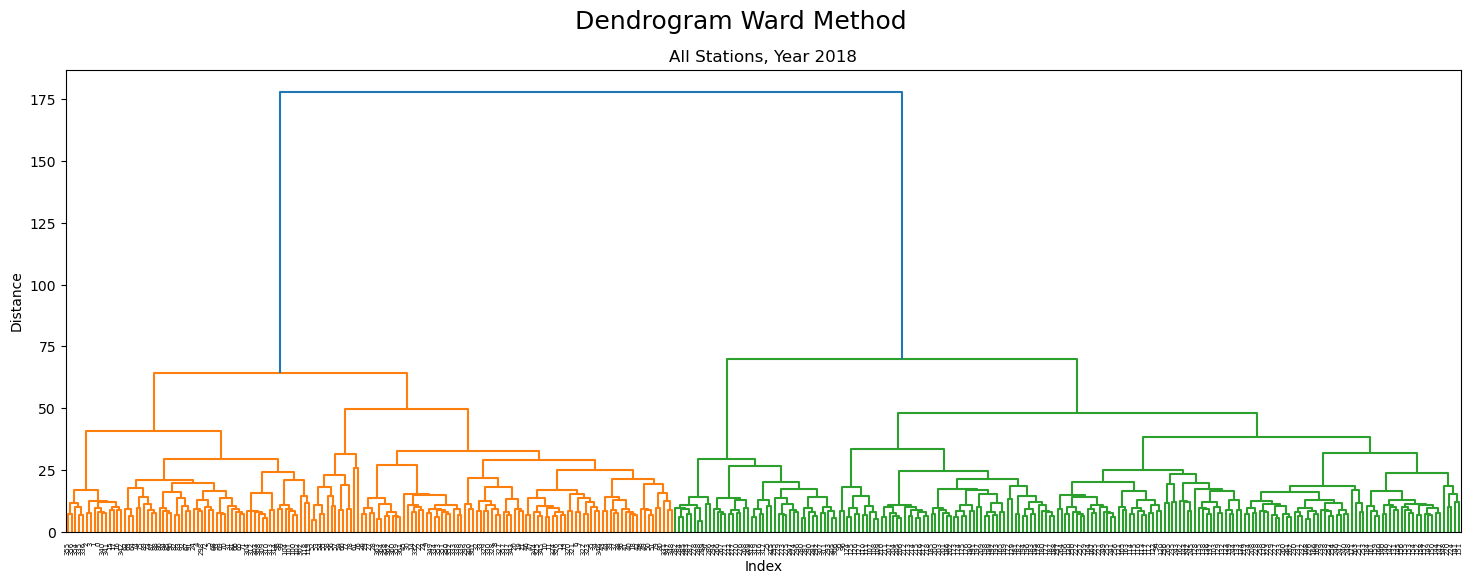

In [101]:
# Clusters and Dendograms using 'ward' method
dist_sin = linkage(df3_scaled,method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('All Stations, Year 2018')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

Ward method is creating 2 big clusters. The way distance is defined, seems to make the distinction between clusters clear.

In [102]:
df3_WM=df3_scaled.copy()
df3_WM['cluster']=fcluster(dist_sin,2, criterion='maxclust')

In [103]:
df3_WM['cluster'].value_counts()

cluster
2    206
1    159
Name: count, dtype: int64

In [104]:
# Adding Pleasant and Unpleasant data to the cluster dataframe
df3_WM[['BUDAPEST_pleasant_weather','BASEL_pleasant_weather']] = 0
df3_WM.loc[:, ['BUDAPEST_pleasant_weather','BASEL_pleasant_weather']] = ans.loc[ans['DATE'].dt.year == 2018, ['BUDAPEST_pleasant_weather','BASEL_pleasant_weather']].values

In [105]:
print('Budapest station pleasant weather:')

pd.crosstab(df3_WM['BUDAPEST_pleasant_weather'],df3_WM['cluster'])

Budapest station pleasant weather:


cluster,1,2
BUDAPEST_pleasant_weather,,
0,148,67
1,11,139


In [106]:
print('Basel station pleasant weather:')

pd.crosstab(df3_WM['BASEL_pleasant_weather'],df3_WM['cluster'])

Basel station pleasant weather:


cluster,1,2
BASEL_pleasant_weather,,
0,154,84
1,5,122


All pleasnat days are in cluster 2 and unpleasant days are in both clusters.

## 06. Creating a Dataframe for PCA

In [107]:
df3 = weather

In [108]:
df3.head(3)

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1960-01-01,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.1,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,1960-01-02,6,2.1,0.84,1.018,0

In [109]:
# Scaling data
df3_scaled = StandardScaler().fit_transform(df3.drop(columns = 'DATE'))

In [110]:
df3_scaled = pd.DataFrame(df3_scaled,columns=df3.drop(columns= 'DATE').columns)

In [111]:
df3_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,-0.478356,-1.206433,0.905270,0.321771,-0.743149,-0.371315,0.283983,-1.016876,-1.220210,-0.949203,-0.25524,-0.010098,-0.005876,-1.118537,-0.321868,-0.773378,-1.099163,-1.119431,-1.136839,0.713782,2.781340,0.357839,-1.232471,-1.197013,0.049619,-1.077312,-0.114356,0.263326,-0.411047,1.232526,0.815394,0.625746,-0.005606,-1.157575,-0.305938,-0.131344,-1.014908,-0.105836,0.060555,-0.410423,1.317965,0.660721,-0.348893,-0.268791,-0.927601,-0.667864,-1.158624,0.833387,1.332572,-1.376592,-1.187370,0.141032,-0.073841,-1.064721,-0.106469,0.393470,-1.038492,0.420616,0.449867,-0.801741,-1.069690,0.747355,-0.647708,-0.182904,-0.251893,-0.466503,1.205492,-0.02373,1.864672,-0.008724,-1.203514,-0.

In [117]:
#Run the PCA model, reducing to number of distinct features that is 11
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(df3_scaled)

In [118]:
principalComponents

array([[ 6.59260922,  3.57980519, -2.50181332, ..., -0.06761932,
        -0.71716711, -0.39935847],
       [ 6.92703455,  3.75066555, -2.30961706, ...,  0.50608864,
        -0.35001966,  0.19681972],
       [ 7.22432906,  2.62338748, -2.90595441, ...,  1.40040177,
        -0.02324231,  0.03817811],
       ...,
       [-4.31467157,  0.52576403, -3.03540291, ..., -1.4397999 ,
        -0.36398708,  2.13533695],
       [-3.04064757, -0.0363204 , -2.5680052 , ..., -1.09324104,
        -0.19943148,  1.77614536],
       [-1.57502647,  1.27313962, -2.12884632, ..., -1.74524384,
        -0.4907976 ,  1.35630927]])

In [119]:
# Creating a dataframe of new componants
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3','PCA4','PCA5', 'PCA6','PCA7','PCA8','PCA9','PCA10','PCA11'])

In [120]:
dfPCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,6.592609,3.579805,-2.501813,3.464234,-1.493243,2.072489,0.697235,1.208703,-0.067619,-0.717167,-0.399358
1,6.927035,3.750666,-2.309617,0.954381,-1.248837,0.003128,-1.686335,0.919825,0.506089,-0.350020,0.196820
2,7.224329,2.623387,-2.905954,-2.194733,-2.026765,-0.384469,-0.018839,-0.106539,1.400402,-0.023242,0.038178
3,7.684972,0.175528,-4.253391,-1.526584,-1.039687,1.067518,-1.483792,-0.723350,-0.010292,0.130908,-1.230757
4,7.430865,0.408172,-3.526691,-0.288855,0.498535,2.020001,0.402310,1.527624,-2.852324,-1.523035,-0.812704


In [121]:
# Adding Date Column
dfPCA['DATE'] =df3['DATE'].values

In [122]:
dfPCA['DATE'] = pd.to_datetime(dfPCA['DATE'], format = '%Y%m%d')

In [123]:
dfPCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,DATE
0,6.592609,3.579805,-2.501813,3.464234,-1.493243,2.072489,0.697235,1.208703,-0.067619,-0.717167,-0.399358,1960-01-01
1,6.927035,3.750666,-2.309617,0.954381,-1.248837,0.003128,-1.686335,0.919825,0.506089,-0.350020,0.196820,1960-01-02
2,7.224329,2.623387,-2.905954,-2.194733,-2.026765,-0.384469,-0.018839,-0.106539,1.400402,-0.023242,0.038178,1960-01-03
3,7.684972,0.175528,-4.253391,-1.526584,-1.039687,1.067518,-1.483792,-0.723350,-0.010292,0.130908,-1.230757,1960-01-04
4,7.430865,0.408172,-3.526691,-0.288855,0.498535,2.020001,0.402310,1.527624,-2.852324,-1.523035,-0.812704,1960-01-05


In [124]:
#Exporting the dataframe for Hierarchical clustering
dfPCA.to_csv(os.path.join(path, 'Unsupervised','pca_reduced.csv'), index = False)